In [1]:
import numpy as np
from scipy.stats import norm
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)

In [ ]:
# NOTE: Edit the run names to the correct directory on your machine
#       and ensure that these runs have first been evaluated using
#           CUDA_VISIBLE_DEVICES=0 ./main.py --model <run_name> --test-ood
#       replacing <run_name> with each of the appropriate runs
fmnist_run_name = "image_runs/Apr21_18-17-16"
fmnist_in = np.load(fmnist_run_name + "/ood_metrics_test_in.npy")
fmnist_out = np.load(fmnist_run_name + "/ood_metrics_test_out.npy")
fmnist_in_train = np.load(fmnist_run_name + "/ood_metrics_train_in.npy")
fmnist_out_train = np.load(fmnist_run_name + "/ood_metrics_train_out.npy")

mnist_run_name = "image_runs/May14_16-39-46"
mnist_in = np.load(mnist_run_name + "/ood_metrics_test_in.npy")
mnist_out = np.load(mnist_run_name + "/ood_metrics_test_out.npy")
mnist_in_train = np.load(mnist_run_name + "/ood_metrics_train_in.npy")
mnist_out_train = np.load(mnist_run_name + "/ood_metrics_train_out.npy")

fmnist_stump = DecisionTreeClassifier(max_depth=1)
X_fmnist = np.concatenate([fmnist_in_train[:, 0], fmnist_out_train[:, 0]], axis=0).reshape(-1, 1)
y_fmnist = np.concatenate([np.ones_like(fmnist_in_train[:, 0]), np.zeros_like(fmnist_out_train[:, 0])], axis=0)
fmnist_stump.fit(X_fmnist, y_fmnist)
fmnist_threshold = fmnist_stump.tree_.threshold[0]

fmnist_stump_rec = DecisionTreeClassifier(max_depth=1)
X_fmnist_rec = np.concatenate([fmnist_in_train[:, 1], fmnist_out_train[:, 1]], axis=0).reshape(-1, 1)
y_fmnist_rec = np.concatenate([np.ones_like(fmnist_in_train[:, 1]), np.zeros_like(fmnist_out_train[:, 1])], axis=0)
fmnist_stump_rec.fit(X_fmnist_rec, y_fmnist_rec)
fmnist_threshold_rec = fmnist_stump_rec.tree_.threshold[0]

mnist_stump = DecisionTreeClassifier(max_depth=1)
X_mnist = np.concatenate([mnist_in_train[:, 0], mnist_out_train[:, 0]], axis=0).reshape(-1, 1)
y_mnist = np.concatenate([np.ones_like(mnist_in_train[:, 0]), np.zeros_like(mnist_out_train[:, 0])], axis=0)
mnist_stump.fit(X_mnist, y_mnist)
mnist_threshold = mnist_stump.tree_.threshold[0]

mnist_stump_rec = DecisionTreeClassifier(max_depth=1)
X_mnist_rec = np.concatenate([mnist_in_train[:, 1], mnist_out_train[:, 1]], axis=0).reshape(-1, 1)
y_mnist_rec = np.concatenate([np.ones_like(mnist_in_train[:, 1]), np.zeros_like(mnist_out_train[:, 1])], axis=0)
mnist_stump_rec.fit(X_mnist_rec, y_mnist_rec)
mnist_threshold_rec = mnist_stump_rec.tree_.threshold[0]

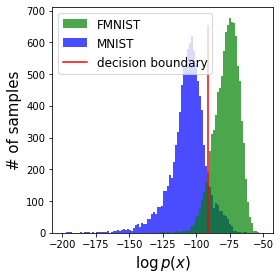

In [3]:
fig, ax = plt.subplots(1, 1)

plt.plot([fmnist_threshold, fmnist_threshold], [0, 650], color='r', label="decision boundary")
plt.hist(fmnist_out[:, 0], color='b', bins=100, histtype="stepfilled",
         alpha=0.7, label='MNIST', range=[-200, -50])
plt.hist(fmnist_in[:, 0], color='g', bins=100, histtype="stepfilled",
         alpha=0.7, label='FMNIST', range=[-200, -50])

ax.set_xlabel(r'$\log p(x)$', fontsize=15)
ax.set_ylabel(r'# of samples', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=2, fontsize=12)

plt.tight_layout()
# plt.savefig("runs/fmnist_loglik_ood.png", bbox_inches='tight')

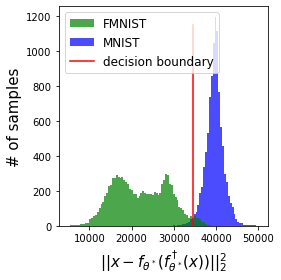

In [4]:
fig, ax = plt.subplots(1, 1)

plt.plot([fmnist_threshold_rec, fmnist_threshold_rec], [0, 1150], color='r', label="decision boundary")
plt.hist(fmnist_out[:, 1], color='b', bins=100, histtype="stepfilled",
         alpha=0.7, label='MNIST', range=[5000, 50000])
plt.hist(fmnist_in[:, 1], color='g', bins=100, histtype="stepfilled",
         alpha=0.7, label='FMNIST', range=[5000, 50000])

ax.set_xlabel(r'$||x - f_{\theta^*}(f_{\theta^*}^\dagger(x))||_2^2$', fontsize=15)
ax.set_ylabel(r'# of samples', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=2, fontsize=12)

plt.tight_layout()
# plt.savefig("runs/fmnist_rec_ood.png", bbox_inches='tight')

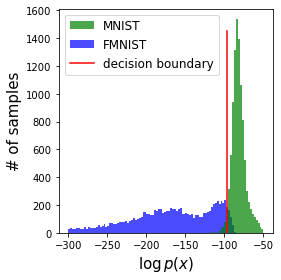

In [18]:
fig, ax = plt.subplots(1, 1)

plt.plot([mnist_threshold, mnist_threshold], [0, 1450], color='r', label="decision boundary")
plt.hist(mnist_out[:, 0], color='b', bins=100, histtype="stepfilled",
         alpha=0.7, label='FMNIST', range=[-300, -50])
plt.hist(mnist_in[:, 0], color='g', bins=100, histtype="stepfilled",
         alpha=0.7, label='MNIST', range=[-300, -50])

ax.set_xlabel(r'$\log p(x)$', fontsize=15)
ax.set_ylabel(r'# of samples', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=2, fontsize=12)

plt.tight_layout()
plt.savefig("runs/mnist_loglik_ood.png", bbox_inches='tight')

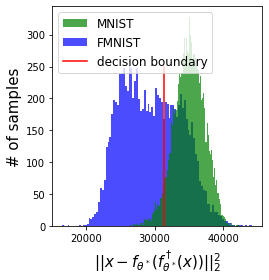

In [16]:
fig, ax = plt.subplots(1, 1)

plt.plot([mnist_threshold_rec, mnist_threshold_rec], [0, 250], color='r', label="decision boundary")
plt.hist(mnist_out[:, 1], color='b', bins=100, histtype="stepfilled",
         alpha=0.7, label='FMNIST')
plt.hist(mnist_in[:, 1], color='g', bins=100, histtype="stepfilled",
         alpha=0.7, label='MNIST')

ax.set_xlabel(r'$||x - f_{\theta^*}(f_{\theta^*}^\dagger(x))||_2^2$', fontsize=15)
ax.set_ylabel(r'# of samples', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=2, fontsize=12)

plt.tight_layout()
plt.savefig("runs/mnist_rec_ood.png", bbox_inches='tight')

In [3]:
cifar_run_name = "runs/ood_arrays_cifar_exact"
cifar_in = np.load(cifar_run_name + "/ood_metrics_test_in.npy")
cifar_out = np.load(cifar_run_name + "/ood_metrics_test_out.npy")
cifar_in_train = np.load(cifar_run_name + "/ood_metrics_train_in.npy")
cifar_out_train = np.load(cifar_run_name + "/ood_metrics_train_out.npy")

cifar_stump = DecisionTreeClassifier(max_depth=1)
X_cifar = np.concatenate([cifar_in_train[:, 0], cifar_out_train[:, 0]], axis=0).reshape(-1, 1)
y_cifar = np.concatenate([np.ones_like(cifar_in_train[:, 0]), np.zeros_like(cifar_out_train[:, 0])], axis=0)
cifar_stump.fit(X_cifar, y_cifar)
cifar_threshold = cifar_stump.tree_.threshold[0]

cifar_stump_rec = DecisionTreeClassifier(max_depth=1)
X_cifar_rec = np.concatenate([cifar_in_train[:, 1], cifar_out_train[:, 1]], axis=0).reshape(-1, 1)
y_cifar_rec = np.concatenate([np.ones_like(cifar_in_train[:, 1]), np.zeros_like(cifar_out_train[:, 1])], axis=0)
cifar_stump_rec.fit(X_cifar_rec, y_cifar_rec)
cifar_threshold_rec = cifar_stump_rec.tree_.threshold[0]

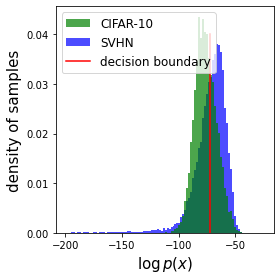

In [22]:
fig, ax = plt.subplots(1, 1)

plt.plot([cifar_threshold, cifar_threshold], [0, 0.04], color='r', label="decision boundary")
plt.hist(cifar_out[:, 0], color='b', bins=100, histtype="stepfilled",
         alpha=0.7, label='SVHN', range=[-200, -25], density=True)
plt.hist(cifar_in[:, 0], color='g', bins=100, histtype="stepfilled",
         alpha=0.7, label='CIFAR-10', range=[-200, -25], density=True)

ax.set_xlabel(r'$\log p(x)$', fontsize=15)
ax.set_ylabel(r'density of samples', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=2, fontsize=12)

plt.tight_layout()
plt.savefig("runs/cifar_loglik_ood.png", bbox_inches='tight')

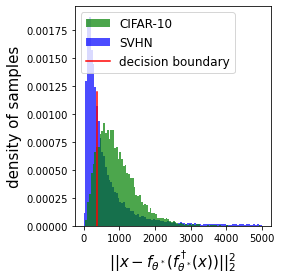

In [23]:
fig, ax = plt.subplots(1, 1)

plt.plot([cifar_threshold_rec, cifar_threshold_rec], [0, 0.0012], color='r', label="decision boundary")
plt.hist(cifar_out[:, 1], color='b', bins=100, histtype="stepfilled",
         alpha=0.7, label='SVHN', range=[0, 5000], density=True)
plt.hist(cifar_in[:, 1], color='g', bins=100, histtype="stepfilled",
         alpha=0.7, label='CIFAR-10', range=[0, 5000],  density=True)

ax.set_xlabel(r'$||x - f_{\theta^*}(f_{\theta^*}^\dagger(x))||_2^2$', fontsize=15)
ax.set_ylabel(r'density of samples', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=2, fontsize=12)

plt.tight_layout()
plt.savefig("runs/cifar_rec_ood.png", bbox_inches='tight')